In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import glob,os

In [2]:
df_original=pd.read_csv('dataset.csv')
df_original.head(n=1)


,Unnamed: 0,Patient ID,Diagnosis,Pathes
0,0,12906,0,archive/12906/0/12906_idx5_x1051_y1301_class0.png


In [3]:
df_original=df_original.drop(labels='Unnamed: 0',axis=1)
df_original.head(n=1)

,Patient ID,Diagnosis,Pathes
0,12906,0,archive/12906/0/12906_idx5_x1051_y1301_class0.png


In [20]:
# from sklearn.model_selection import train_test_split
# df_train,df_test=train_test_split(df_original,test_size=0.3,random_state=8)

In [4]:
df_train = pd.read_csv("df_train.csv")

In [5]:
df_train = df_train.drop("Unnamed: 0",axis=1)

In [6]:
df_train.shape

(7000, 3)

In [7]:
df_test = pd.read_csv("df_test_st.csv")

In [8]:
df_test = df_test.drop("Unnamed: 0",axis=1)

In [9]:
df_test.shape

(3000, 3)

In [10]:
from PIL import Image
# random_train['Pixels']=np.array(random_train['Pathes'].map(lambda x:np.asarray(open(x).resize((128,128)))))
# random_train['Pixels']=random_train.loc[:,['Pathes']].map(lambda x:np.asarray(open(x).resize((128,128))))
X_train_MLP=df_train['Pathes'].map(lambda x:np.asarray(Image.open(x).resize((50,50))))



In [11]:
X_train_MLP.shape

(7000,)

In [12]:
from keras.preprocessing.image import img_to_array
from keras.applications.mobilenet_v2 import preprocess_input
img_list = []
for i in range (0,len(X_train_MLP)):
    brain_img =np.array(X_train_MLP)[i]
    img_arr = img_to_array(brain_img).astype(np.float32)
    img_list.append(preprocess_input(img_arr))
X_scaled = np.array(img_list)

print(X_scaled.shape)

(7000, 50, 50, 3)


In [13]:
X_train_shape = X_scaled.shape[1]*X_scaled.shape[2]*X_scaled.shape[3]
X_Flatten = X_scaled.reshape(X_scaled.shape[0],X_train_shape)

In [14]:
X_Flatten.shape

(7000, 7500)

In [15]:
X_test_MLP=df_test["Pathes"].map(lambda x:np.asarray(Image.open(x).resize((50,50))))

In [16]:
image_list = []
for i in range (0,len(X_test_MLP)):
    brain_img =np.array(X_test_MLP)[i]
    img_arr = img_to_array(brain_img).astype(np.float32)
    image_list.append(preprocess_input(img_arr))
X_scaled_test = np.array(image_list)

print(X_scaled_test.shape)

(3000, 50, 50, 3)


In [17]:
X_test_shape = X_scaled_test.shape[1]*X_scaled.shape[2]*X_scaled.shape[3]
X_Flatten_test = X_scaled_test.reshape(X_scaled_test.shape[0],X_test_shape)

In [18]:
X_Flatten_test.shape

(3000, 7500)

<b>stop!!!!!!!</b>

In [37]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty = 'l2', C = 0.0001, random_state = 0)

LR.fit(X_Flatten, np.array(df_train['Diagnosis']))
print(LR.score(X_Flatten, np.array(df_train['Diagnosis'])), LR.score(X_Flatten_test, np.array(df_test['Diagnosis'])))

0.7754285714285715 0.7786666666666666


In [38]:
from sklearn.metrics import classification_report

In [41]:
y_pred_LR = LR.predict(X_Flatten_test)

In [43]:
print(classification_report(y_pred_LR,np.array(df_test['Diagnosis'])))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       788
           1       0.75      0.79      0.77       712

    accuracy                           0.78      1500
   macro avg       0.78      0.78      0.78      1500
weighted avg       0.78      0.78      0.78      1500



<h1>PCA</h1>

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(0.8)

In [21]:
pca.fit(X_Flatten)

PCA(n_components=0.8)

In [23]:
x = pca.transform(X_Flatten)

In [24]:
x_test = pca.transform(X_Flatten_test)

<b>Logistic Regression</b>

In [28]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty = 'l2', C = 0.0001, random_state = 0)


In [29]:
LR.fit(x, np.array(df_train['Diagnosis']))

LogisticRegression(C=0.0001, random_state=0)

In [31]:
y_pred_LR = LR.predict(x_test)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_LR,np.array(df_test['Diagnosis'])))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1682
           1       0.72      0.80      0.76      1318

    accuracy                           0.78      3000
   macro avg       0.78      0.78      0.78      3000
weighted avg       0.78      0.78      0.78      3000



In [34]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [35]:
accuracy_score(y_pred_LR,np.array(df_test['Diagnosis']))

0.7796666666666666

In [36]:
precision_score(y_pred_LR,np.array(df_test['Diagnosis']))

0.7248459958932238

In [37]:
recall_score(y_pred_LR,np.array(df_test['Diagnosis']))

0.8034901365705615

In [38]:
f1_score(y_pred_LR,np.array(df_test['Diagnosis']))

0.7621446563512055

<AxesSubplot:>

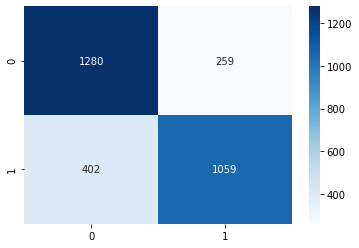

In [39]:
import seaborn as sns
sns.heatmap(np.array(confusion_matrix(np.array(df_test["Diagnosis"]),y_pred_LR)),annot=True, cmap='Blues', fmt='d')

<b>random forest</b>

In [40]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=201, max_depth=None, min_samples_split=2, random_state=0)


In [41]:
RF_model.fit(x, np.array(df_train['Diagnosis']))

RandomForestClassifier(n_estimators=201, random_state=0)

In [42]:
prediction_RF = RF_model.predict(x_test)

In [43]:
print(classification_report(prediction_RF,np.array(df_test["Diagnosis"])))

              precision    recall  f1-score   support

           0       0.85      0.76      0.81      1718
           1       0.72      0.82      0.77      1282

    accuracy                           0.79      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.80      0.79      0.79      3000



In [44]:
accuracy_score(prediction_RF,np.array(df_test["Diagnosis"]))

0.7896666666666666

In [45]:
precision_score(prediction_RF,np.array(df_test["Diagnosis"]))

0.7227926078028748

In [46]:
recall_score(prediction_RF,np.array(df_test["Diagnosis"]))

0.8237129485179407

In [47]:
f1_score(prediction_RF,np.array(df_test["Diagnosis"]))

0.7699598979219834

<AxesSubplot:>

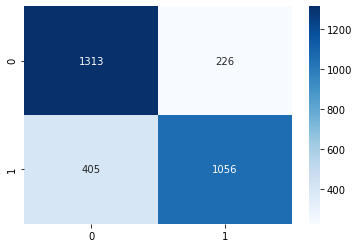

In [48]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(np.array(confusion_matrix(np.array(df_test["Diagnosis"]),prediction_RF)),annot=True, cmap='Blues', fmt='d')